In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [8]:
df1 = pd.read_csv(r'C:\Users\user\Downloads\0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv')

In [9]:
df = df1.copy()

In [10]:
df_num = df.drop('Date',axis=1)

In [11]:
for i in df_num.columns:
    df_num[i].ffill(inplace=True)

In [12]:
# Create a new dataframe with only the 'Close column 
closing_prices = df_num.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = closing_prices.values

# Normalizing Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


# Getting  the train and test array
training_data_len = int(( len(dataset) * .80 ))
train_data, test_data = scaled_data[:training_data_len], scaled_data[training_data_len:]



In [43]:
# training dataset
def prepare_x_train_y_train(data, stepping_time):
    x_train = []
    y_train = []
    for i in range(len(data)-stepping_time-1):
        x_train.append(data[i:i+stepping_time,0])
        y_train.append(data[i+stepping_time,0])
    return np.array(x_train), np.array(y_train)

In [106]:
stepping_time = 10
x_train, y_train = prepare_x_train_y_train(train_data, stepping_time)
x_test, y_test = prepare_x_train_y_train(test_data, stepping_time)


In [107]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(stepping_time,1)))
model.add(GRU(32,return_sequences=False))
model.add(Dropout(0.10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=40,batch_size=32)

Epoch 1/40
67/67 [==============================] - 3s 12ms/step - loss: 0.0099 - val_loss: 9.8320e-04
Epoch 2/40
67/67 [==============================] - 0s 5ms/step - loss: 9.2820e-04 - val_loss: 9.4770e-04
Epoch 3/40
67/67 [==============================] - 0s 5ms/step - loss: 8.2735e-04 - val_loss: 6.7211e-04
Epoch 4/40
67/67 [==============================] - 0s 5ms/step - loss: 7.5232e-04 - val_loss: 6.2431e-04
Epoch 5/40
67/67 [==============================] - 0s 5ms/step - loss: 6.9698e-04 - val_loss: 6.1078e-04
Epoch 6/40
67/67 [==============================] - 0s 7ms/step - loss: 6.0841e-04 - val_loss: 5.8417e-04
Epoch 7/40
67/67 [==============================] - 0s 6ms/step - loss: 6.0001e-04 - val_loss: 6.8285e-04
Epoch 8/40
67/67 [==============================] - 0s 5ms/step - loss: 5.5072e-04 - val_loss: 6.9734e-04
Epoch 9/40
67/67 [==============================] - 0s 5ms/step - loss: 5.1126e-04 - val_loss: 6.7145e-04
Epoch 10/40
67/67 [==============================

In [98]:
# loss = model.evaluate(X_test, y_test)
print('Test Loss:', model.evaluate(x_test, y_test))

17/17 [==============================] - 1s 4ms/step - loss: 141758976.0000
Test Loss: 141758976.0


In [108]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

# Get the root mean squared error (RMSE)
rmse = (np.sqrt(np.mean(((predictions - y_test) ** 2))))
rmse 

17/17 [==============================] - 1s 3ms/step


185.04356564968472

In [67]:
# Save the model weights            
model.save_weights('MODEL2.h5')
print('GRU model weights saved successfully.')

GRU model weights saved successfully.


In [16]:
prepare_x_train_y_train(train_data,10)

(array([[[0.06387819],
         [0.06812123],
         [0.06848332],
         ...,
         [0.06404067],
         [0.06645   ],
         [0.06573511]],
 
        [[0.06812123],
         [0.06848332],
         [0.06674712],
         ...,
         [0.06645   ],
         [0.06573511],
         [0.06783807]],
 
        [[0.06848332],
         [0.06674712],
         [0.06504339],
         ...,
         [0.06573511],
         [0.06783807],
         [0.06327002]],
 
        ...,
 
        [[0.58663475],
         [0.58663475],
         [0.58013089],
         ...,
         [0.58594775],
         [0.58283268],
         [0.58888627]],
 
        [[0.58663475],
         [0.58013089],
         [0.56896614],
         ...,
         [0.58283268],
         [0.58888627],
         [0.58921124]],
 
        [[0.58013089],
         [0.56896614],
         [0.57408193],
         ...,
         [0.58888627],
         [0.58921124],
         [0.59059468]]]),
 array([0.06783807, 0.06327002, 0.0629033 , ..., 0.5892

In [ ]:
# Prepare the data for training and testing
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 5  # Define the number of time steps
X_train, y_train = prepare_data(train_data, time_steps)
X_test, y_test = prepare_data(test_data, time_steps)

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []



for i in range(10,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

In [68]:
df = df1.copy()

In [69]:
df.head()

Date         Open         High          Low        Close  \
0  2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195   
1  2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902   
2  2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805   
3  2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098   
4  2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000   

     Adj Close  Volume  
0  5232.200195     0.0  
1  5277.899902     0.0  
2  5281.799805     0.0  
3  5263.100098     0.0  
4  5244.750000     0.0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2694 non-null   object 
 1   Open       2667 non-null   float64
 2   High       2667 non-null   float64
 3   Low        2667 non-null   float64
 4   Close      2667 non-null   float64
 5   Adj Close  2667 non-null   float64
 6   Volume     2667 non-null   float64
dtypes: float64(6), object(1)
memory usage: 147.5+ KB


In [71]:
df.isnull().sum()

Date          0
Open         27
High         27
Low          27
Close        27
Adj Close    27
Volume       27
dtype: int64

In [72]:
df_num = df.drop('Date',axis=1)

In [73]:
df_num.head()

Open         High          Low        Close    Adj Close  Volume
0  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195     0.0
1  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902     0.0
2  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805     0.0
3  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098     0.0
4  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000     0.0

In [74]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],open = df['Open'],
                                    close=df['Close'],
                                    high=df['High'],
                                    low= df['Low']),
                     go.Scatter(x= df['Date'],y = ma_df[ma_df.columns[0]], line =dict(color = 'orange', width=1),name=ma_df.columns[0] ),
                     go.Scatter(x=df['Date'],y=ma_df[ma_df.columns[1]], line=dict(color = 'green',width=1),name=ma_df.columns[1]),
                     go.Scatter(x=df['Date'],y= ma_df[ma_df.columns[2]],line= dict(color='purple',width=1),name=ma_df.columns[2]),
                     ])

fig.update_layout(height=1200, width=1800)
fig.show()

In [75]:
for i in df_num.columns:
    df_num[i].ffill(inplace=True)

In [76]:
df_num.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [77]:
df_num.head()

Open         High          Low        Close    Adj Close  Volume
0  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195     0.0
1  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902     0.0
2  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805     0.0
3  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098     0.0
4  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000     0.0

In [78]:
df['Date'] = pd.to_datetime(df['Date'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2694 non-null   datetime64[ns]
 1   Open       2667 non-null   float64       
 2   High       2667 non-null   float64       
 3   Low        2667 non-null   float64       
 4   Close      2667 non-null   float64       
 5   Adj Close  2667 non-null   float64       
 6   Volume     2667 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 147.5 KB


In [80]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [81]:
df.columns[0]

'Date'

In [82]:
fig = make_subplots(rows=3, cols=2)



fig.add_trace(

    go.Scatter(x=df['Date'], y= df_num[df_num.columns[0]], name=df.columns[1]),
    row=1,col=1

)

fig.add_trace(

    go.Scatter(x=df['Date'], y= df_num[df_num.columns[1]], name=df.columns[2]),
    row=1, col=2
    
)

fig.add_trace(

    go.Scatter(x=df['Date'], y= df_num[df_num.columns[2]], name=df.columns[3]),
    row=2,col=1

)

fig.add_trace(

    go.Scatter(x=df['Date'], y= df_num[df_num.columns[3]], name= df.columns[4]),
    row=2,col=2
    

)

fig.add_trace(

    go.Scatter(x=df['Date'], y= df_num[df_num.columns[4]], name=df.columns[5]),
    row=3,col=1
    

)

fig.add_trace(

    go.Scatter(x=df['Date'], y= df_num[df_num.columns[5]], name=df.columns[6]),
    row=3,col=2
    
)


fig.update_layout(height=600, width=800)
fig.show()

In [83]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],open = df_num['Open'],
                                    close=df_num['Close'],
                                    high=df_num['High'],
                                    low= df_num['Low']),
                     ])

fig.update_layout(height=1200, width=1800)
fig.show()

In [84]:
import datetime
datetime.datetime.today()
datetime.datetime(2015, 8, 24, 23, 24, 55, 173504)
datetime.datetime.today().weekday()


0

In [85]:
df.describe()

Open          High           Low         Close     Adj Close  \
count   2667.000000   2667.000000   2667.000000   2667.000000   2667.000000   
mean    8269.195149   8312.379344   8211.006332   8261.834986   8261.834986   
std     2585.209169   2592.927841   2568.153153   2581.268450   2581.268450   
min     4623.149902   4623.149902   4531.149902   4544.200195   4544.200195   
25%     5815.699951   5855.649902   5764.375000   5817.650147   5817.650147   
50%     8132.950195   8180.200195   8089.399902   8129.350098   8129.350098   
75%    10481.300295  10534.850100  10415.774905  10471.750000  10471.750000   
max    15371.450200  15431.750000  15243.400390  15314.700200  15314.700200   

             Volume  
count  2.667000e+03  
mean   2.178558e+05  
std    2.291874e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.662000e+05  
75%    2.771000e+05  
max    1.811000e+06

In [86]:
ma_day = [10,20,30]
column_ma = [0,0,0]
for i,ma in enumerate(ma_day):
    column_name = f'MA of {ma} days'
    column_ma[i] = np.array(df['Adj Close'].rolling(ma).mean())
    
print(column_ma)

[array([         nan,          nan,          nan, ..., 14511.004983,
       14550.015041, 14554.979982]), array([          nan,           nan,           nan, ..., 14609.0148955,
       14628.3949245, 14617.6949245]), array([           nan,            nan,            nan, ...,
       14649.99329667, 14645.458303  , 14635.51162333])]


In [87]:
column_ma[0]

array([         nan,          nan,          nan, ..., 14511.004983,
       14550.015041, 14554.979982])

In [88]:
columns = ['MA for 10 days','MA for 20 days','MA for 30 days']

In [89]:
ma_df = pd.DataFrame(data= column_ma)

In [90]:
ma_df = ma_df.T

In [91]:
ma_df

0             1             2
0              NaN           NaN           NaN
1              NaN           NaN           NaN
2              NaN           NaN           NaN
3              NaN           NaN           NaN
4              NaN           NaN           NaN
...            ...           ...           ...
2689  14473.809963  14576.849953  14675.179983
2690  14455.629983  14582.032424  14660.334963
2691  14511.004983  14609.014895  14649.993297
2692  14550.015041  14628.394925  14645.458303
2693  14554.979982  14617.694925  14635.511623

[2694 rows x 3 columns]

In [92]:
ma_df.columns = columns

In [93]:
ma_df

MA for 10 days  MA for 20 days  MA for 30 days
0                NaN             NaN             NaN
1                NaN             NaN             NaN
2                NaN             NaN             NaN
3                NaN             NaN             NaN
4                NaN             NaN             NaN
...              ...             ...             ...
2689    14473.809963    14576.849953    14675.179983
2690    14455.629983    14582.032424    14660.334963
2691    14511.004983    14609.014895    14649.993297
2692    14550.015041    14628.394925    14645.458303
2693    14554.979982    14617.694925    14635.511623

[2694 rows x 3 columns]

In [94]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],open = df_num['Open'],
                                    close=df_num['Close'],
                                    high=df_num['High'],
                                    low= df_num['Low']),
                     go.Scatter(x= df['Date'],y = ma_df[ma_df.columns[0]], line =dict(color = 'orange', width=1),name=ma_df.columns[0] ),
                     go.Scatter(x=df['Date'],y=ma_df[ma_df.columns[1]], line=dict(color = 'green',width=1),name=ma_df.columns[1]),
                     go.Scatter(x=df['Date'],y= ma_df[ma_df.columns[2]],line= dict(color='purple',width=1),name=ma_df.columns[2]),
                     ])

fig.update_layout(height=1200, width=1800)
fig.show()

In [95]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [96]:
# Create a new dataframe with only the 'Close column 
data = df_num.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

2156

In [97]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [98]:
scaled_data

array([[0.06387819],
       [0.06812123],
       [0.06848332],
       ...,
       [0.95820525],
       [0.96102318],
       [0.93653028]])

In [99]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.06387819, 0.06812123, 0.06848332, 0.06674712, 0.06504339,
       0.06547511, 0.06185411, 0.06404067, 0.06645   , 0.06573511,
       0.06783807, 0.06327002, 0.0629033 , 0.05106074, 0.04566174,
       0.04305276, 0.02868018, 0.02999395, 0.03136805, 0.03300682,
       0.02654472, 0.03599182, 0.02796062, 0.01619699, 0.01619699,
       0.02007332, 0.02306761, 0.01977624, 0.02624297, 0.02393111,
       0.02892622, 0.03433451, 0.03189729, 0.02791883, 0.02898656,
       0.0302539 , 0.02919084, 0.0292976 , 0.03510511, 0.04389767,
       0.05049904, 0.04977019, 0.05055476, 0.05383221, 0.05174317,
       0.05311265, 0.05470495, 0.05503921, 0.05428715, 0.06071212,
       0.06671924, 0.06137134, 0.06323751, 0.06649642, 0.06850191,
       0.07043776, 0.06668678, 0.06544728, 0.0692911 , 0.07652381])]
[0.07630098924084255]

[array([0.06387819, 0.06812123, 0.06848332, 0.06674712, 0.06504339,
       0.06547511, 0.06185411, 0.06404067, 0.06645   , 0.06573511,
       0.06783807, 0.06327002, 0.06

In [100]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dropout(0.10))
model.add(Dense(1))

# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=40)

Epoch 1/40
66/66 [==============================] - 8s 67ms/step - loss: 0.0050
Epoch 2/40
66/66 [==============================] - 5s 72ms/step - loss: 5.3656e-04
Epoch 3/40
66/66 [==============================] - 4s 68ms/step - loss: 5.0522e-04
Epoch 4/40
66/66 [==============================] - 5s 70ms/step - loss: 5.1456e-04
Epoch 5/40
66/66 [==============================] - 4s 67ms/step - loss: 4.7759e-04
Epoch 6/40
66/66 [==============================] - 4s 66ms/step - loss: 4.1861e-04
Epoch 7/40
66/66 [==============================] - 4s 67ms/step - loss: 4.1250e-04
Epoch 8/40
66/66 [==============================] - 4s 63ms/step - loss: 4.1619e-04
Epoch 9/40
66/66 [==============================] - 4s 63ms/step - loss: 4.0553e-04
Epoch 10/40
66/66 [==============================] - 4s 63ms/step - loss: 4.1907e-04
Epoch 11/40
66/66 [==============================] - 5s 70ms/step - loss: 3.9734e-04
Epoch 12/40
66/66 [==============================] - 4s 63ms/step - loss: 3.97

In [101]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

17/17 [==============================] - 1s 27ms/step


214.47135315405393

C:\Users\user\AppData\Local\Temp/ipykernel_44288/2388977846.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



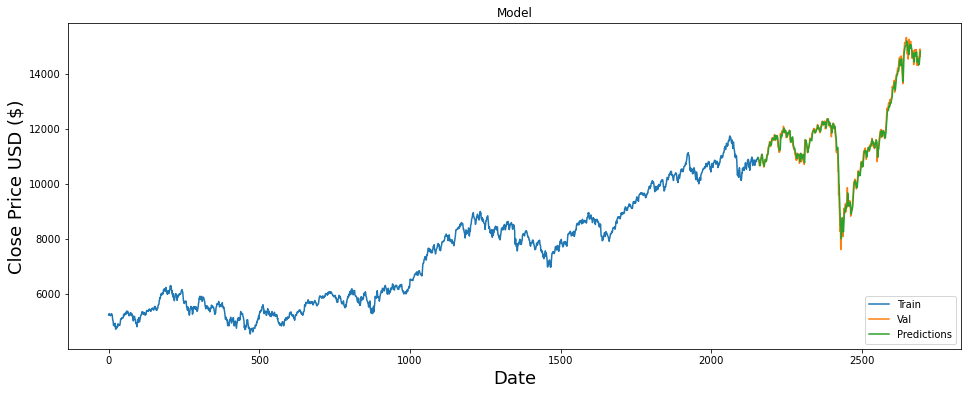

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
valid

Close   Predictions
2156  10831.50000  10942.026367
2157  10849.79981  10885.169922
2158  10780.54981  10855.196289
2159  10661.54981  10811.918945
2160  10652.20020  10727.145508
...           ...           ...
2689  14485.00000  14328.612305
2690  14653.04981  14397.619141
2691  14864.54981  14529.401367
2692  14894.90039  14706.357422
2693  14631.09961  14805.861328

[538 rows x 2 columns]

In [102]:
from sklearn.metrics import r2_score

In [103]:
r2 = r2_score(valid['Close'],valid['Predictions'])
r2

0.9885053403848484

In [104]:
df_num.head()

Open         High          Low        Close    Adj Close  Volume
0  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195     0.0
1  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902     0.0
2  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805     0.0
3  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098     0.0
4  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000     0.0

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [146]:


# time_step = 15

tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(GRU(64,return_sequences=True))
model.add(GRU(25))
model.add(Dropout(0.10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


# # Build the GRU model
# model = Sequential()
# model.add(GRU(32, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(GRU(32, return_sequences=True))
# model.add(GRU(32))
# model.add(Dropout(0.10))
# # model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model 
# model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=40)


Epoch 1/40


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 2, 1), found shape=(None, 60, 1)


In [ ]:
model.save_weights('MODEL1.h5')

In [144]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

17/17 [==============================] - 1s 19ms/step


190.44594502423735

In [107]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

17/17 [==============================] - 1s 12ms/step


ValueError: Found array with dim 3. Estimator expected <= 2.

C:\Users\user\AppData\Local\Temp/ipykernel_44288/2388977846.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



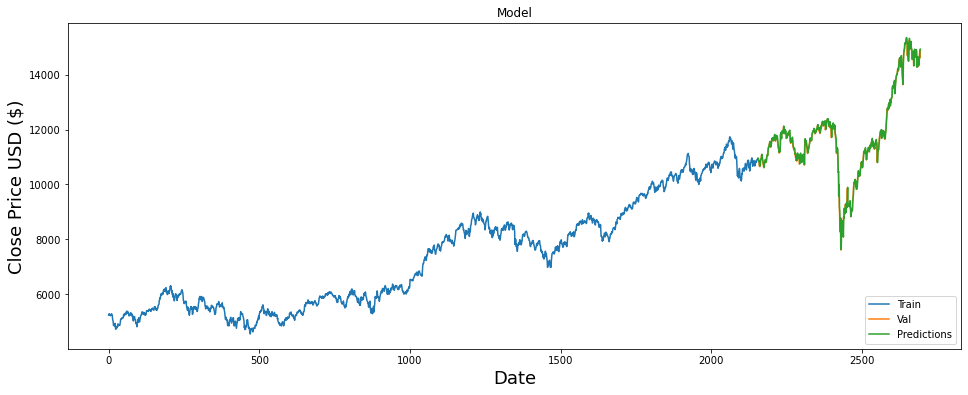

In [46]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [51]:
valid

Close   Predictions
2156  10831.50000  10776.658203
2157  10849.79981  10691.569336
2158  10780.54981  10714.889648
2159  10661.54981  10642.287109
2160  10652.20020  10529.456055
...           ...           ...
2689  14485.00000  13477.500977
2690  14653.04981  13558.696289
2691  14864.54981  13650.760742
2692  14894.90039  13765.540039
2693  14631.09961  13784.956055

[538 rows x 2 columns]